# 3 Виконання

## 3.1 

### Для початку імпортуємо модулі pandas, numpy, seaborn, matplotlib. Завантажимо датафрейм.

In [538]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('data/Crime.csv')
df.head()

,CrimeRate,Youth,Southern,Education,ExpenditureYear0,LabourForce,Males,MoreMales,StateSize,YouthUnemployment,...,ExpenditureYear10,LabourForce10,Males10,MoreMales10,StateSize10,YouthUnemploy10,MatureUnemploy10,HighYouthUnemploy10,Wage10,BelowWage10
0,45.5,135,0,12.4,69,540,965,0,6,80,...,71,564,974,0,6,82,20,1,632,142
1,52.3,140,0,10.9,55,535,1045,1,6,135,...,54,540,1039,1,7,138,39,1,521,210
2,56.6,157,1,11.2,47,512,962,0,22,97,...,44,529,959,0,24,98,33,0,359,256
3,60.3,139,1,11.9,46,480,968,0,19,135,...,41,497,983,0,20,131,50,0,510,235
4,64.2,126,0,12.2,106,599,989,0,40,78,...,97,602,989,0,42,79,24,1,660,162


*Завантаження датафрейму*

### Переставимо колонку у "Southern" на перше місце, оскільки розташування штату не змінювався.

In [539]:
southern_name = 'Southern'
southern = df.pop(southern_name)
df.insert(0, southern_name, southern)
df.head()

,Southern,CrimeRate,Youth,Education,ExpenditureYear0,LabourForce,Males,MoreMales,StateSize,YouthUnemployment,...,ExpenditureYear10,LabourForce10,Males10,MoreMales10,StateSize10,YouthUnemploy10,MatureUnemploy10,HighYouthUnemploy10,Wage10,BelowWage10
0,0,45.5,135,12.4,69,540,965,0,6,80,...,71,564,974,0,6,82,20,1,632,142
1,0,52.3,140,10.9,55,535,1045,1,6,135,...,54,540,1039,1,7,138,39,1,521,210
2,1,56.6,157,11.2,47,512,962,0,22,97,...,44,529,959,0,24,98,33,0,359,256
3,1,60.3,139,11.9,46,480,968,0,19,135,...,41,497,983,0,20,131,50,0,510,235
4,0,64.2,126,12.2,106,599,989,0,40,78,...,97,602,989,0,42,79,24,1,660,162


*Переставлення колонки*

### Переставимо показники через 10 років у звичайні колонки, розділивши датафрейм надвоє та з'єднавши частини вертикально. Таким чином ми збільшуємо розмір вибірки у два рази, тому модель матиме більше даних, аніж у тому випадку якби ми знаходили, наприклад, середнє арифметичне між колонками за 10 років.

In [540]:
df10 = df.loc[:, 'CrimeRate10':]
df.drop(df.columns[14:], axis=1, inplace=True)
df10.insert(0, southern_name, southern)
df10.columns = df.columns
df = pd.concat([df, df10], axis=0, ignore_index=True)
df.rename(columns={'ExpenditureYear0': 'ExpenditureYear'}, inplace=True)
rate = 'CrimeRate'
rate_s = df.pop(rate)
df.insert(0, rate, rate_s)

df

,CrimeRate,Southern,Youth,Education,ExpenditureYear,LabourForce,Males,MoreMales,StateSize,YouthUnemployment,MatureUnemployment,HighYouthUnemploy,Wage,BelowWage
0,45.5,0,135,12.4,69,540,965,0,6,80,22,1,564,139
1,52.3,0,140,10.9,55,535,1045,1,6,135,40,1,453,200
2,56.6,1,157,11.2,47,512,962,0,22,97,34,0,288,276
3,60.3,1,139,11.9,46,480,968,0,19,135,53,0,457,249
4,64.2,0,126,12.2,106,599,989,0,40,78,25,1,593,171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,157.3,1,131,12.1,109,548,976,0,52,82,34,0,539,219
90,162.7,0,142,12.2,95,612,1003,1,13,97,36,0,625,196
91,169.6,0,134,12.2,116,580,987,0,104,79,36,0,719,172
92,177.2,0,140,15.2,141,578,995,0,160,110,40,0,739,169


### Побудуємо матрицю кореляцій.

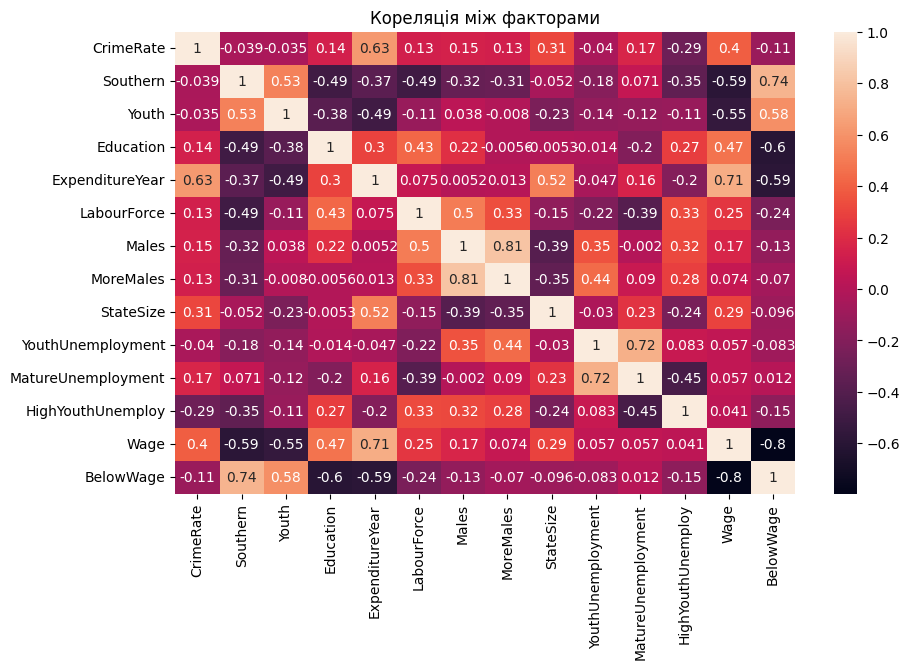

In [541]:
def corr_map(df, figsize):
    fig, axis = plt.subplots(figsize=figsize)
    axis.set_title('Кореляція між факторами')
    sns.heatmap(df.corr(), ax=axis, annot=True)
corr_map(df, (10, 6))

*Матриця кореляцій*

### Оскільки матриця має доволі багато взаємозалежних величин, то пропоную написати функцію, що буде давати оцінку точності, тобто функцію навчання моделі. За допомогою оцінювача LinearRegression та PolynomialFeatures, навчимо модель. Проведемо оцінку моделі за допомогою методу score.

In [542]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def poly_train_test(df, degree=1):
    x_train, x_test, y_train, y_test = train_test_split(
    df.iloc[:, 1:].values,
    df.iloc[:, 0].values,
    random_state=11)
    
    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), StandardScaler(), LinearRegression())
    polyreg_scaled.fit(x_train, y_train)
    train_score = round(polyreg_scaled.score(x_train, y_train), 5)
    test_score = round(polyreg_scaled.score(x_test, y_test), 5)
    print(f'Train accuracy: {train_score}')
    print(f'Test accuracy: {test_score}')

*Функція оцінки якості моделі*

### Проведемо оцінку якості моделі без маніпулювання над датафреймом.

In [543]:
poly_train_test(df, 1)

Train accuracy: 0.67618
Test accuracy: 0.47606


*Оцінка якості моделі без маніпулювання над датафреймом*

### Бачимо, що точність не висока, оскільки багато даних залить один від одного. Спробуємо виправити це.

### Дізнаємося про зв'язок між YouthUnemployment та MatureUnemployment. Спробуємо прибрати один зі стовпчиків. Побудуємо лінійну регресію, зобразимо її.

            2
-0.0003638 x + 0.4147 x - 2.831


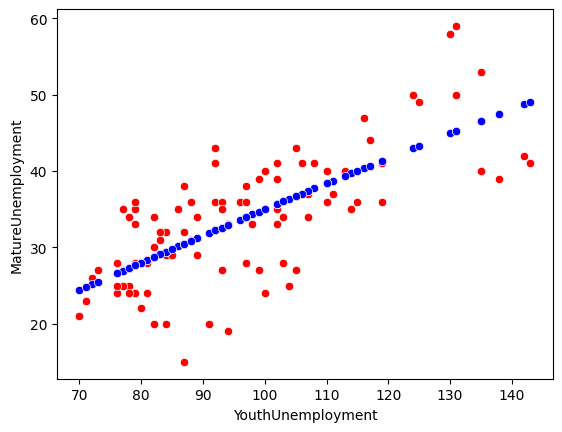

In [544]:
model = np.poly1d(
    np.polyfit(df['YouthUnemployment'], df['MatureUnemployment'], 2))
fig, axis = plt.subplots(1, 1)
sns.scatterplot(
    x=df['YouthUnemployment'], y=df['MatureUnemployment'], color='r')
sns.scatterplot(
    x=df['YouthUnemployment'], y=model(df['YouthUnemployment']), color='b')
print(model)

*Регресія*

### Віднімемо результати моделі від MatureUnemployment.

Train accuracy: 0.67609
Test accuracy: 0.47543


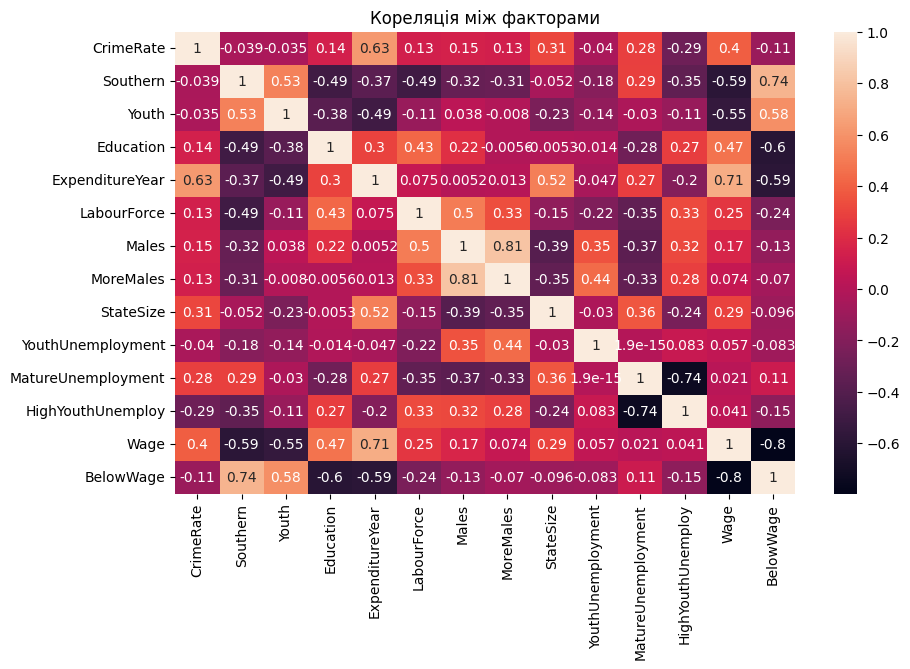

In [545]:
df['MatureUnemployment'] -= model(df['YouthUnemployment'])
corr_map(df, (10, 6))
poly_train_test(df, 1)

*Пониження кореляції*

### Побачимо, що кореляція зменшилася до майже нуля, і точність не сильно пігіршилася. Видалимо колонку YouthUnemployment та знову перерахуємо точність.

Train accuracy: 0.67478
Test accuracy: 0.47218


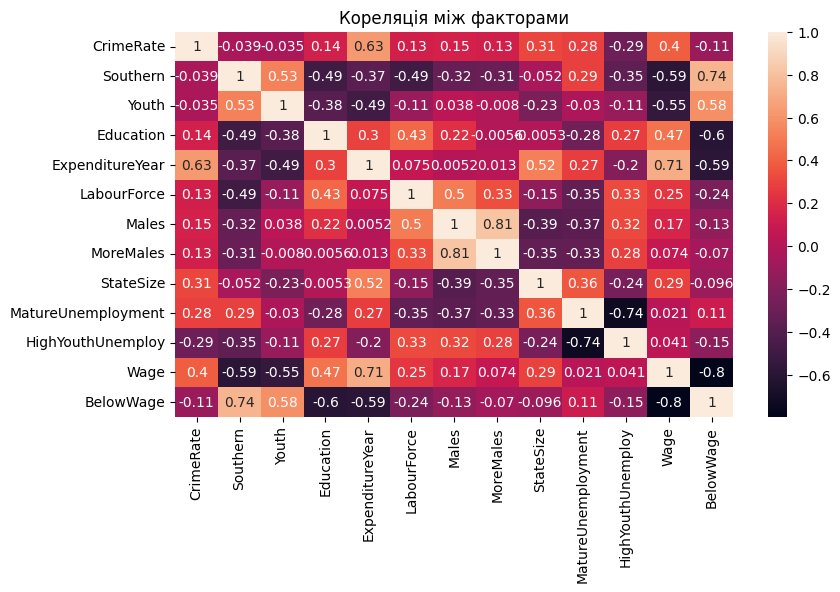

In [546]:
def poly(df, x, y, degree=1):
    model = np.poly1d(np.polyfit(df[x], df[y], degree))
    return model

def plot_poly(df, x, y, model, axis=None):
    if axis is None:
        return
    sns.scatterplot(x=df[x], y=df[y], color='r', ax=axis)
    sns.scatterplot(x=df[x], y=model(df[x]), color='b', ax=axis)

name = 'YouthUnemployment'
df.drop([name], axis=1, inplace=True)
poly_train_test(df, 1)
corr_map(df, (9, 5))


*Матриця кореляцій*

In [547]:
dd = df.copy()

### Виконаємо пониження кореляції для BelowWage. Побудуємо графіки розподілу.

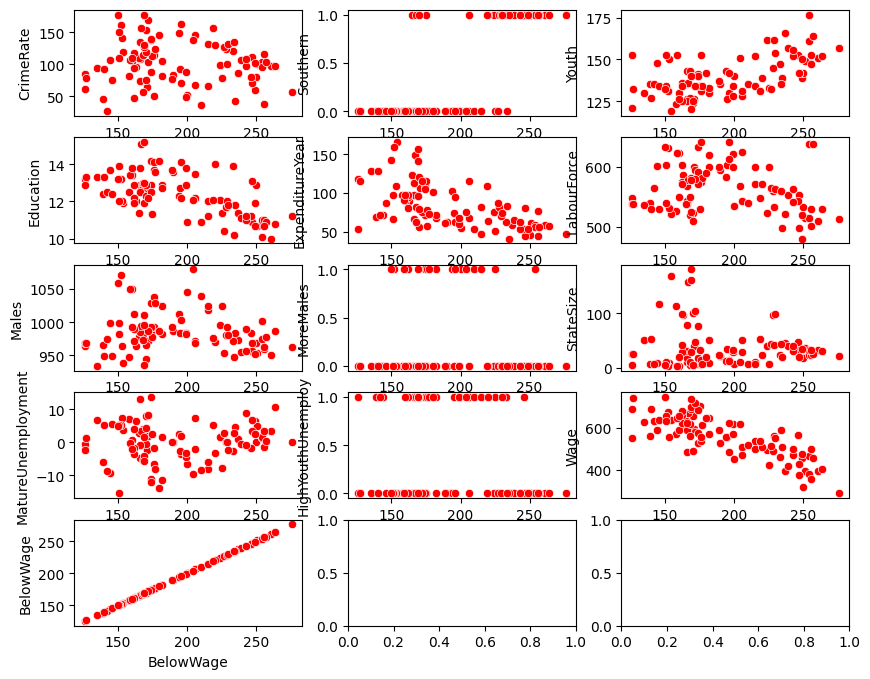

In [548]:
df = dd.copy()
name = 'BelowWage'
nrows = 5
ncols = 3
fig, axis = plt.subplots(nrows, ncols, figsize=(10, 8))  
for i, n in enumerate(df.columns):
    row = i // ncols
    col = i % ncols
    sns.scatterplot(x=df[name], y=df[n], color='r', ax=axis[row][col])

*Графіки розподілу*

### Спробуємо побудувати регресію для кожного випадку.

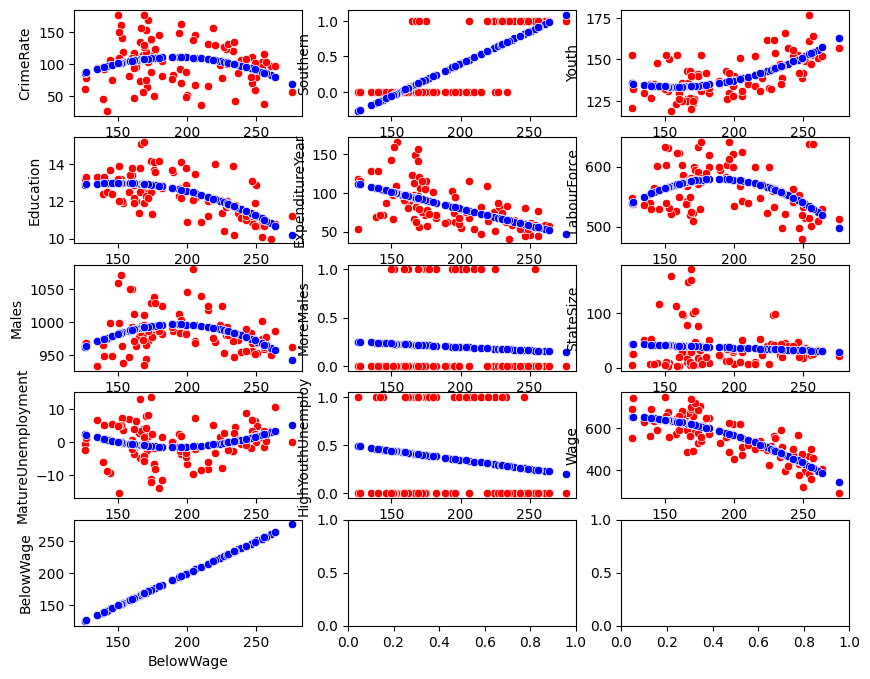

In [549]:
df = dd.copy()
name = 'BelowWage'
nrows = 5
ncols = 3
fig, axis = plt.subplots(nrows, ncols, figsize=(10, 8))
degrees = {'CrimeRate': 2, 'Southern': 1, 'Youth': 2, 'Education': 2,
           'ExpenditureYear': 1, 'LabourForce': 2, 'Males': 2,
           'MoreMales': 1, 'StateSize': 1, 'MatureUnemployment': 2,
           'HighYouthUnemploy': 1, 'Wage': 2, 'BelowWage': 1}
for i, n in enumerate(df.columns):
    row = i // ncols
    col = i % ncols
    model = poly(df, name, n, degrees[n])
    plot_poly(df, name, n, model, axis[row][col])

*Графіки регресій*

### Застосуємо дані моделі, видалимо стовпчик. Точність виросла на 5% - це успіх.

Train accuracy: 0.69167
Test accuracy: 0.52795


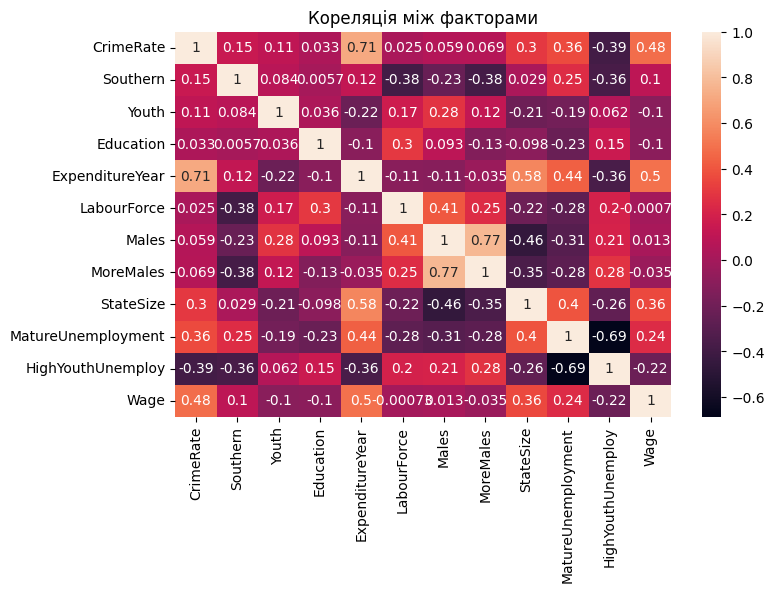

In [550]:
for i, n in enumerate(df.columns):
    model = poly(df, name, n, degrees[n])
    df[n] -= model(df[name])
    
df.drop([name], axis=1, inplace=True)
poly_train_test(df, 1)
corr_map(df, (8, 5))

*Матриця кореляцій*

## 3.3 Тестування моделі

In [551]:
poly_train_test(df, 1)

Train accuracy: 0.69167
Test accuracy: 0.52795
